## House Price (Regression) Computational Example:

Import Libraries:

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

## Standardize Data:

In [190]:
# We read in both train and test csv files into dataframes via pandas:
df_train = pd.read_csv('train.csv'); df_test = pd.read_csv('test.csv')

# We strip the output (SalePrice) from the training dataset:
y_train = df_train['SalePrice']; 
df_train = df_train.drop('SalePrice', axis=1)

# We merge the two dataframes now:
combined = pd.concat([df_train, df_test], axis=0)

# We construct columns that are categorical to encode the data:
categorical_columns = ['MSSubClass','MSZoning','Street','Alley',
'Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
'Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
'PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

# We convert the Categorical into Numerical
label_encoder = LabelEncoder()
for col in categorical_columns:
    combined[col] = label_encoder.fit_transform(combined[col])

# We split the combined back into df_train and df_test:
split_row = 1460
df_train = combined.iloc[:split_row]
df_test = combined.iloc[split_row:]

# Fix the blank values in the numerical data:
df_train = df_train.fillna(0); df_test = df_test.fillna(0)

# Find remodel date relative to the build date for both test and train:
df_train['YearRemodAdd'] = df_train['YearRemodAdd']-df_train['YearBuilt']
df_test['YearRemodAdd'] = df_test['YearRemodAdd']-df_test['YearBuilt']

# We also drop any columns that just seem irrelevant:
df_train = df_train.drop('LandContour', axis=1)
df_test = df_test.drop('LandContour', axis=1)
df_train = df_train.drop('GarageYrBlt', axis=1)
df_test = df_test.drop('GarageYrBlt', axis=1)
df_train = df_train.drop('Condition1', axis=1)
df_test = df_test.drop('Condition1', axis=1)
df_train = df_train.drop('Condition2', axis=1)
df_test = df_test.drop('Condition2', axis=1)
df_train = df_train.drop('Electrical', axis=1)
df_test = df_test.drop('Electrical', axis=1)
df_train = df_train.drop('LandSlope', axis=1)
df_test = df_test.drop('LandSlope', axis=1)
df_train = df_train.drop('RoofMatl', axis=1)
df_test = df_test.drop('RoofMatl', axis=1)
df_train = df_train.drop('Heating', axis=1)
df_test = df_test.drop('Heating', axis=1)
df_train = df_train.drop('Street', axis=1)
df_test = df_test.drop('Street', axis=1)
df_train = df_train.drop('Alley', axis=1)
df_test = df_test.drop('Alley', axis=1)
#df_train.to_csv('output_file.csv', index=False)

# We Standardize the data:
scaler = StandardScaler()
train_std = scaler.fit_transform(df_train)
test_std = scaler.fit_transform(df_test)

## PCA Reduction of Data:

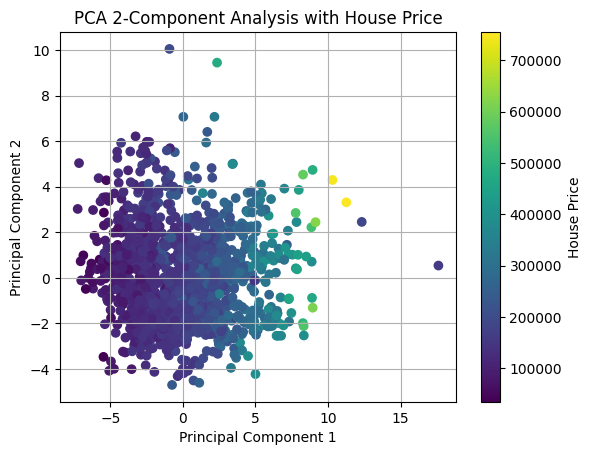

Explained Variance Ratio:
[0.15053709 0.05876819]


In [204]:
# Initialize an instance of PCA with 2 components:
pca = PCA(n_components=2); 
pca_train = pca.fit_transform(train_std)
pca_test = pca.fit_transform(test_std)

# We create a results dataframe for pca_train:
pca_train_df = pd.DataFrame(data=pca_train, 
columns=['PCA1', 'PCA2'])
pca_train_df['House Price'] = y_train

# WE create a results dataframe for pca_test:
pca_test_df = pd.DataFrame(data=pca_test, 
columns=[f'PC{i+1}' for i in range(2)])

# We visualize the PCA Analysis:
plt.scatter(pca_train_df['PCA1'], pca_train_df['PCA2'], 
c=pca_train_df['House Price'])
cbar = plt.colorbar(); cbar.set_label('House Price')

# Title, Label, Grid, and Show Plot:
plt.title('PCA 2-Component Analysis with House Price')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True); plt.show()

# Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

## t-SNE Reduction of Data:

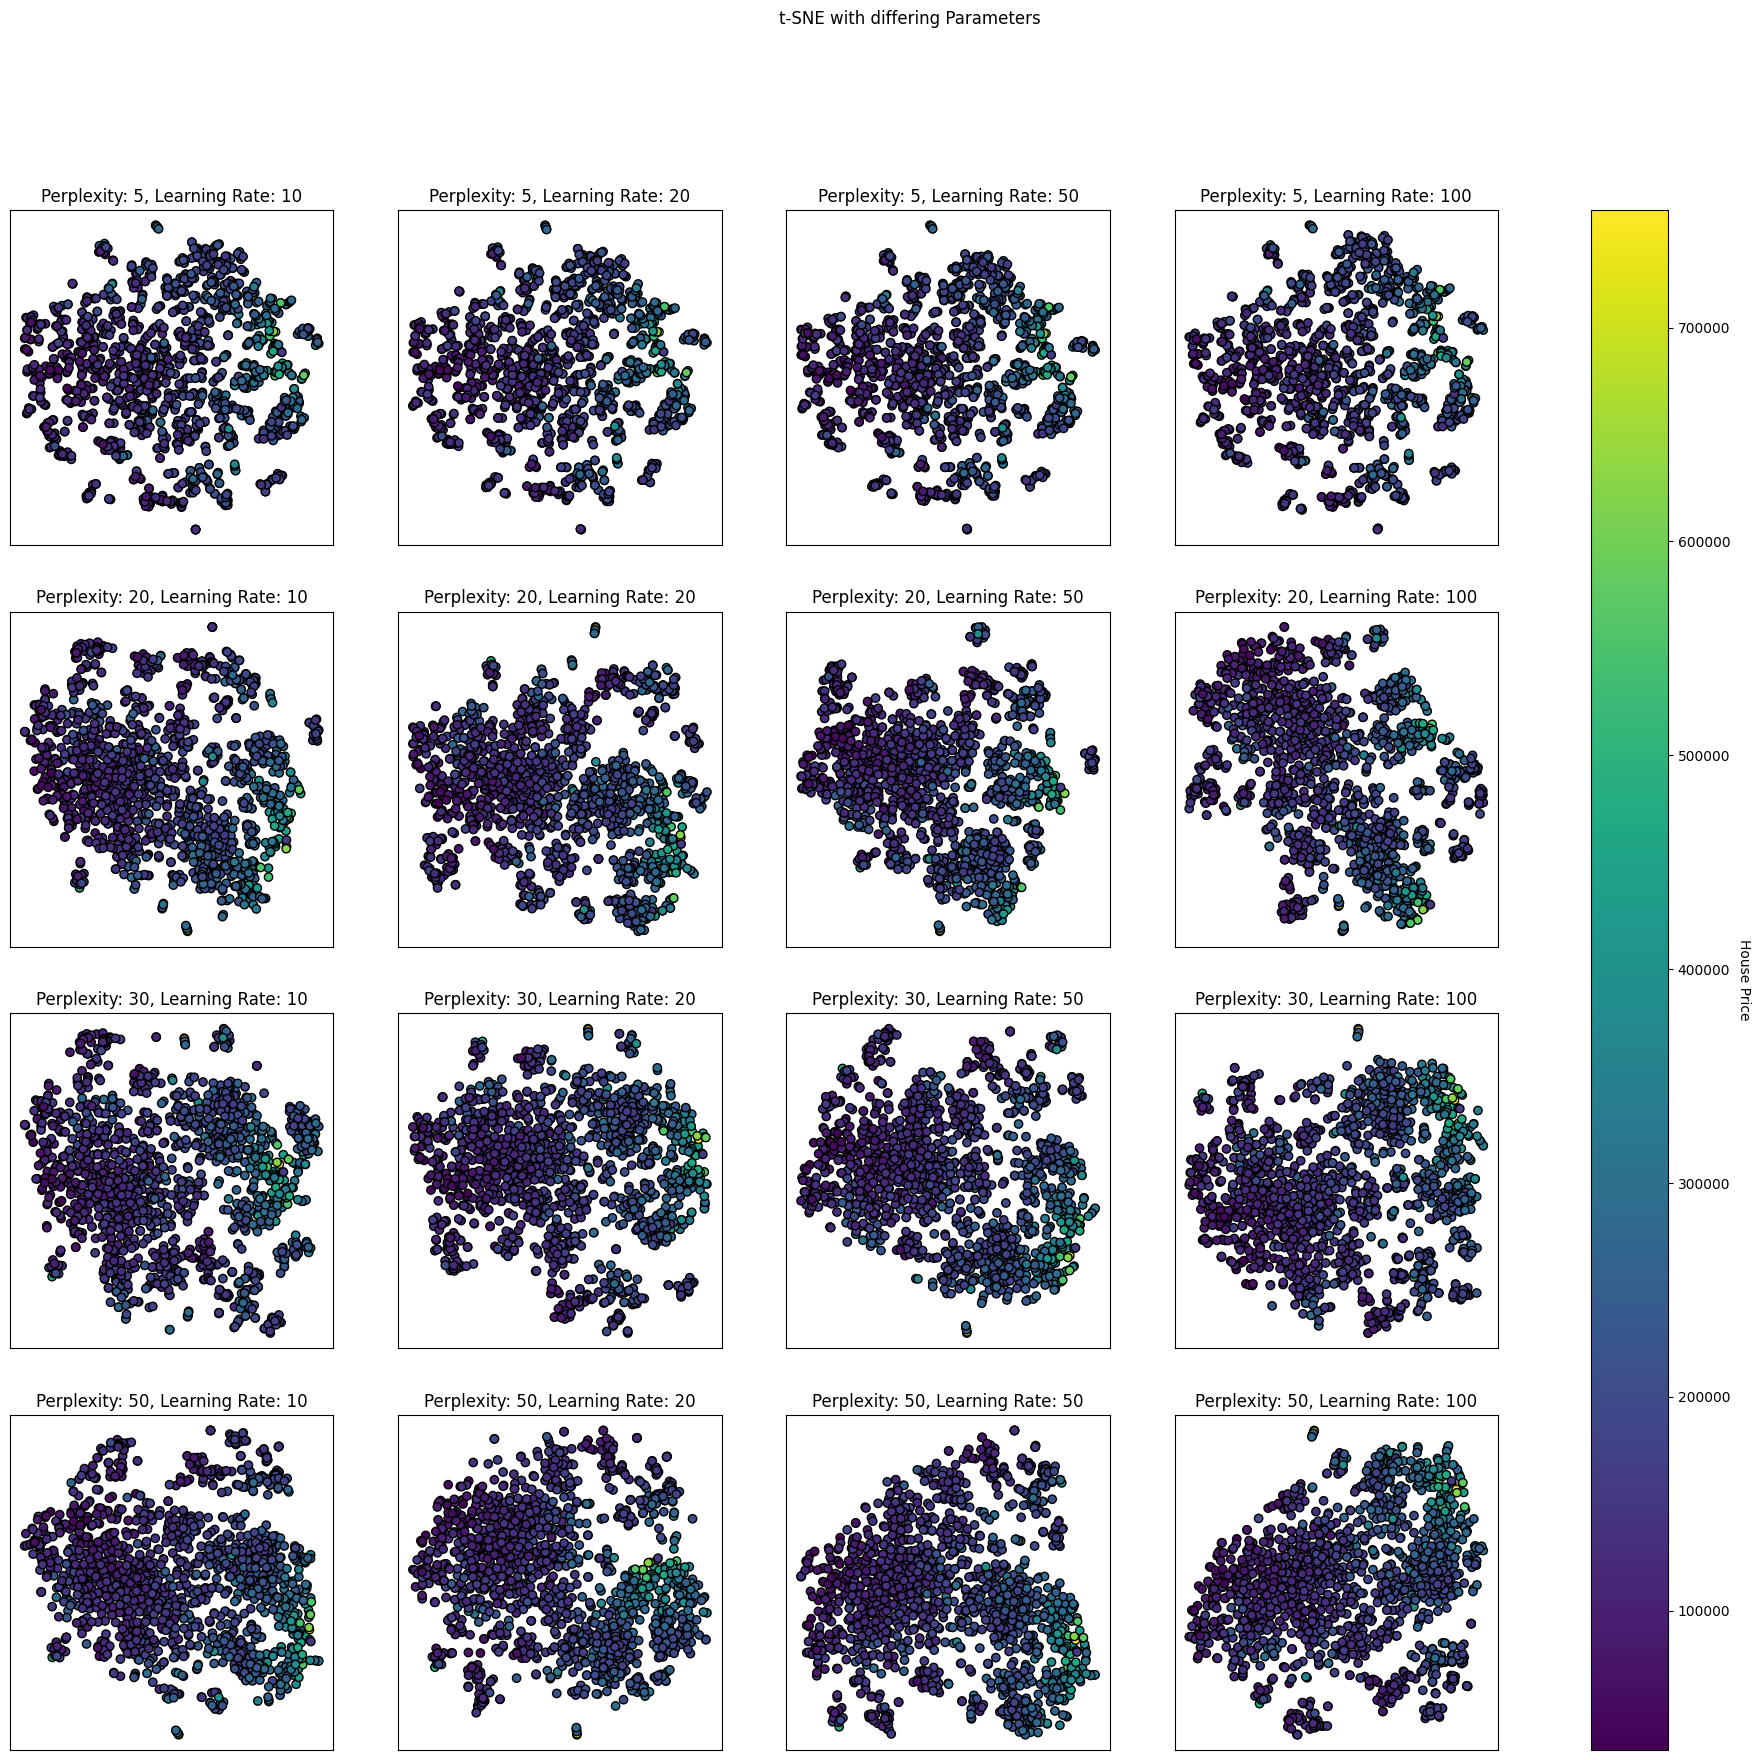

Max silhouette score:  -0.65787935


In [198]:
# Define a grid of parameters to perform t-SNE:
ps = [5, 20, 30, 50]; lrs = [10, 20, 50, 100]

# Create subplots and title the plot in advance:
fig, axes = plt.subplots(len(ps), len(lrs), figsize=(24, 20))
fig.suptitle('t-SNE with differing Parameters')

max_score = -2
# Loop through the differing parameters:
for i in range(len(ps)):
    perp = ps[i]
    for j in range(len(lrs)):
        learning = lrs[j]

        # Perform a t-SNE application for each parameter:
        tsne = TSNE(n_components=2, perplexity=perp, 
        learning_rate=learning, random_state=28)
        X_tsne = tsne.fit_transform(train_std)

        # Compute Silhouette Score to Evaluate Performance:
        s_score = silhouette_score(X_tsne, y_train)
        if s_score > max_score:
            params = [perp, learning]
            tsne_train = X_tsne
            max_score = s_score
        
        # Scatter plot of the dimensionality reduction:
        scatter = axes[i,j].scatter(X_tsne[:,0], X_tsne[:,1], 
        c=y_train, edgecolor='k')

        # Label the graphs with the given parameters
        axes[i,j].set_title(f'Perplexity: {perp}, Learning Rate: {learning}')
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        
# Add a common colorbar on the right side for reference:
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical')
cbar.set_label('House Price', rotation=270, labelpad=15)
plt.grid(True); plt.show()

print("Max silhouette score: ",s_score)
# Perform a t-SNE application for each parameter:
tsne = TSNE(n_components=2, perplexity=params[0], 
learning_rate=params[1], random_state=28)
tsne_test = tsne.fit_transform(test_std)

## Multiple Linear Regression:

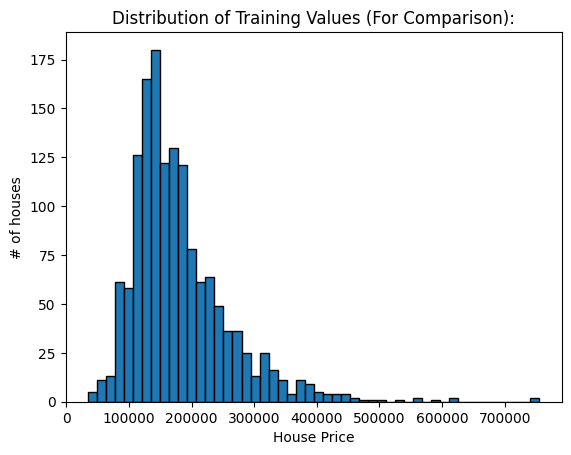

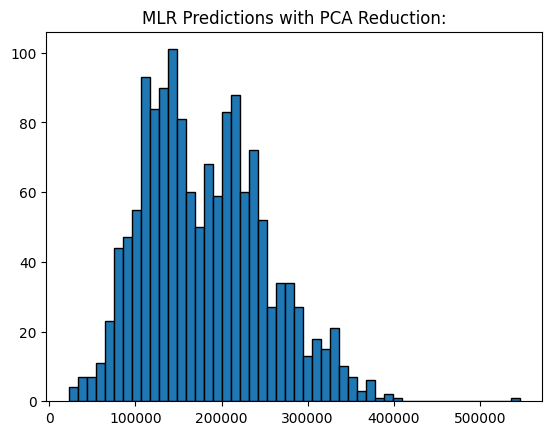

In [205]:
#######################################
# PERFORM MULTIPLE LINEAR REGRESSION: #
#######################################
class MLR:
    def __init__(self, lr=0.01, max_it=10000):
        '''Initializes the Multiple Linear Regression class'''
        # Pre-define learning rate & # of iterations:
        self.lr = lr; self.max_it = max_it

        # Initialize weights and bias to empty:
        self.weights = None; self.bias = None

    def fit(self, X, y):
        '''We initialize the fit based on features and labels'''
        n_s, n_feat = X.shape
        self.weights = np.zeros(n_feat); self.bias = 0
        
        # We solve for the weights via Gradient Descent:
        for i in range(self.max_it):
            # Iteratively compute the weights and bias:
            mu = np.dot(X, self.weights) + self.bias

            # Compute the change in weights and the change in bias:
            dw = (1/n_s)*np.dot(X.T,(mu-y))
            db = (1/n_s)*np.sum(mu-y)

            # Perform the gradient descent:
            self.weights -= self.lr*dw
            self.bias -= self.lr*db

    def pred(self, X):
        '''Return the weighted prediction from the regression'''
        return np.dot(X, self.weights) + self.bias

############
# RUN MLR: #
#########################
# Create an instance MLR:
mlr = MLR()

#print(tsne_train)
# We fit the multiple regression with PCA and make a prediction:
mlr.fit(pca_train, y_train); mlr_y_pca = mlr.pred(pca_test)

#############
# PLOT MLR: #
######################################
# Generate Histogram of training data:
plt.hist(y_train, bins=50, edgecolor='k')

# We label and title and show the training plot:
plt.xlabel('House Price'); plt.ylabel('# of houses')
plt.title('Distribution of Training Values (For Comparison):')
plt.show()

# We label and title and show the PCA plot:
plt.hist(mlr_y_pca, bins=50, edgecolor='k')
plt.title('MLR Predictions with PCA Reduction:')
plt.show()

##############################
# FINAL PREDICTIONS FOR MLR: #
###############################################
# Generate final test data predictions for MLR:
mlr_output = {'Id': test_df['Id'], 'SalePrice': mlr_y_pca}
mlr_output_df = pd.DataFrame(mlr_output)
mlr_output_df.to_csv('mlr.csv', index=False)

## Polynomial Regression:

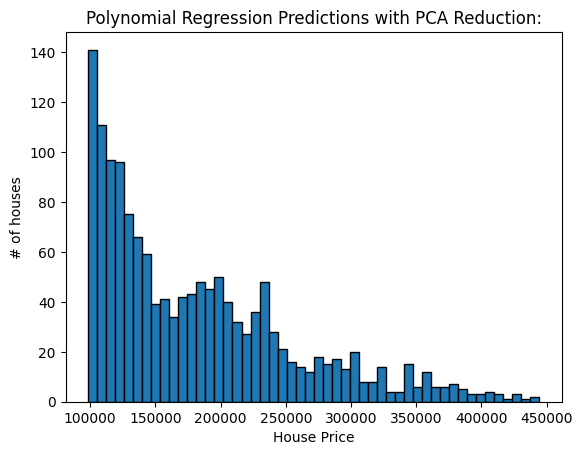

In [206]:
class PR:
    def __init__(self, degree=3):
        '''Initializes the Multiple Linear Regression class'''
        # Initlizes the degree of the polynomial and weights
        self.degree = degree; self.weights = None

    def prep_matrix(self, X):
        '''Preps the feature matrix for requisite operations'''
        # Get number of samples/features from its shape & find bias:
        n_s, n_feat = X.shape; bias = np.ones((n_s, 1))
        feature_matrix = bias
        
        # iterates based on deg() of poly:
        for d in range(1, self.degree + 1):

            # iterates through the features:
            for feature in range(n_feat):

                # compute the matrix based off the degree
                feature_matrix = np.hstack(
                    (feature_matrix, 
                    np.power(X[:, feature], d).reshape(-1, 1))
                )
        
        return feature_matrix

    def fit(self, X, y):
        '''We initialize the fit based on '''
        # prepare features + compute the weights via dotting/inversing:
        X_p = self.prep_matrix(X)
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X_p.T,X_p)),X_p.T),y)
        return self

    def predict(self, X):
        '''Returns the weighted prediction from the regression'''
        # return the features times the finalized weights:
        X_p = self.prep_matrix(X)
        return X_p.dot(self.weights)

##############################
# RUN POLYNOMIAL REGRESSION: #
###########################################
# Create an instance Polynomial Regression:
pr = PR()

# We fit the polynomial regression w/ PCA and make a prediction:
pr.fit(pca_train, y_train); pr_y_pca = pr.predict(pca_test)

###############################
# PLOT POLYNOMIAL REGRESSION: #
##########################################
plt.hist(pr_y_pca, bins=50, edgecolor='k')

# We label and title and show the training plot:
plt.xlabel('House Price'); plt.ylabel('# of houses')
plt.title('Polynomial Regression Predictions with PCA Reduction:')
plt.show()

################################################
# FINAL PREDICTIONS FOR POLYNOMIAL REGRESSION: #
################################################
# Generate final test data predictions for PR:
pr_output = {'Id': test_df['Id'], 'SalePrice': pr_y_pca}
pr_output_df = pd.DataFrame(pr_output)
pr_output_df.to_csv('pr.csv', index=False)

## Ridge Regression:

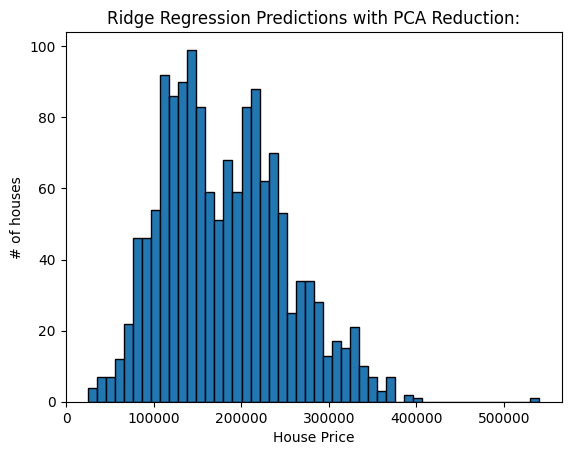

In [207]:
#############################
# PERFORM RIDGE REGRESSION: #
###################################################
# Construct instance of Ridge Class for Regression:
ridge = Ridge(alpha=250.0) 
'''experimenting with the alpha parameter, 
not much noticable differences were perceived'''

# We fit the via ridge regression and make the prediction:
ridge.fit(pca_train, y_train); rr_y_pca = ridge.predict(pca_test)

##########################
# PLOT RIDGE REGRESSION: #
##########################################
plt.hist(rr_y_pca, bins=50, edgecolor='k')

# We label and title and show the training plot:
plt.xlabel('House Price'); plt.ylabel('# of houses')
plt.title('Ridge Regression Predictions with PCA Reduction:')
plt.show()

###########################################
# FINAL PREDICTIONS FOR RIDGE REGRESSION: #
##############################################
# Generate final test data predictions for RR:
rr_output = {'Id': test_df['Id'], 'SalePrice': rr_y_pca}
rr_output_df = pd.DataFrame(rr_output)
rr_output_df.to_csv('ridge.csv', index=False)

## LASSO Regression:

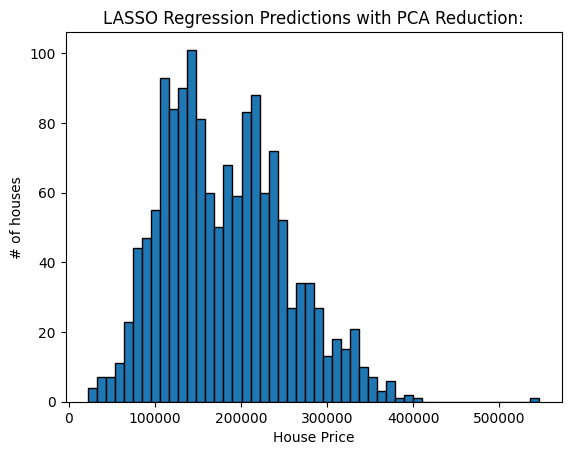

In [208]:
#############################
# PERFORM LASSO REGRESSION: #
###################################################
# Construct instance of LASSO Class for Regression:
lasso = Lasso(alpha=2.0, max_iter=10000)
'''I gave a reasonably high iteration number.
Although changing alpha didn't appear to result
in obvious differences.'''

# We fit the via LASSO regression and make the prediction:
lasso.fit(pca_train, y_train); lr_y_pca = lasso.predict(pca_test)

##########################
# PLOT LASSO REGRESSION: #
##########################################
plt.hist(lr_y_pca, bins=50, edgecolor='k')

# We label and title and show the training plot:
plt.xlabel('House Price'); plt.ylabel('# of houses')
plt.title('LASSO Regression Predictions with PCA Reduction:')
plt.show()

###########################################
# FINAL PREDICTIONS FOR LASSO REGRESSION: #
##############################################
# Generate final test data predictions for LR:
lr_output = {'Id': test_df['Id'], 'SalePrice': lr_y_pca}
lr_output_df = pd.DataFrame(lr_output)
lr_output_df.to_csv('lasso.csv', index=False)

## ElasticNet Regression:

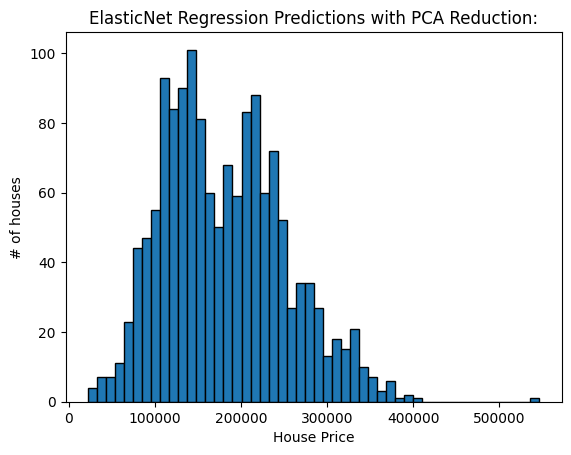

In [209]:
##################################
# PERFORM ElasticNet REGRESSION: #
########################################################
# Construct instance of ElasticNet Class for Regression:
elasticnet = ElasticNet(alpha=2.0, l1_ratio=1.0)
'''alpha appears to affect the shift, while l1 appears
to affect the spread. Both seem rather negligible.'''

# We fit the via ElasticNet regression and make the prediction:
elasticnet.fit(pca_train, y_train); ENr_y_pca = elasticnet.predict(pca_test)

###############################
# PLOT ElasticNet REGRESSION: #
##########################################
plt.hist(ENr_y_pca, bins=50, edgecolor='k')

# We label and title and show the training plot:
plt.xlabel('House Price'); plt.ylabel('# of houses')
plt.title('ElasticNet Regression Predictions with PCA Reduction:')
plt.show()

###########################################
# FINAL PREDICTIONS FOR RIDGE REGRESSION: #
###############################################
# Generate final test data predictions for ENR:
ENr_output = {'Id': test_df['Id'], 'SalePrice': ENr_y_pca}
ENr_output_df = pd.DataFrame(ENr_output)
ENr_output_df.to_csv('elastic.csv', index=False)

## Decision Tree Regression:

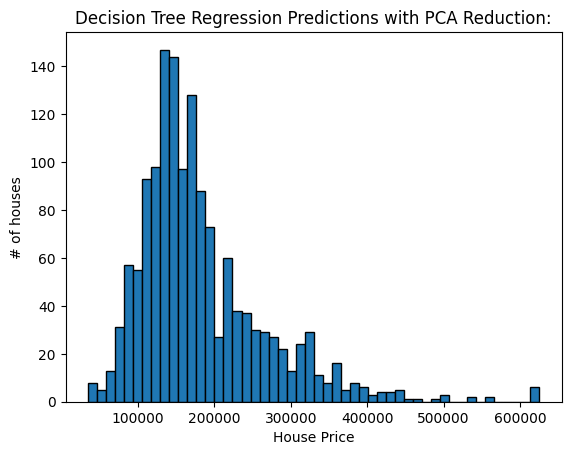

In [210]:
#####################################
# PERFORM DECISION TREE REGRESSION: #
#####################################
# Construct instance of Decision Tree Class for Regression:
decision_tree = DecisionTreeRegressor(max_depth=10000)
'''I gave a reasonably large value for max-depth
to ensure that there is enough depth to suffice'''

# We fit the via Decision Tree regression and make the prediction:
decision_tree.fit(pca_train, y_train); DTr_y_pca = decision_tree.predict(pca_test)

##################################
# PLOT DECISION TREE REGRESSION: #
##########################################
plt.hist(DTr_y_pca, bins=50, edgecolor='k')

# We label and title and show the training plot:
plt.xlabel('House Price'); plt.ylabel('# of houses')
plt.title('Decision Tree Regression Predictions with PCA Reduction:')
plt.show()

###################################################
# FINAL PREDICTIONS FOR DECISION TREE REGRESSION: #
###################################################
# Generate final test data predictions for DTR:
DTr_output = {'Id': test_df['Id'], 'SalePrice': DTr_y_pca}
DTr_output_df = pd.DataFrame(DTr_output)
DTr_output_df.to_csv('decision.csv', index=False)

## SVM Regression:

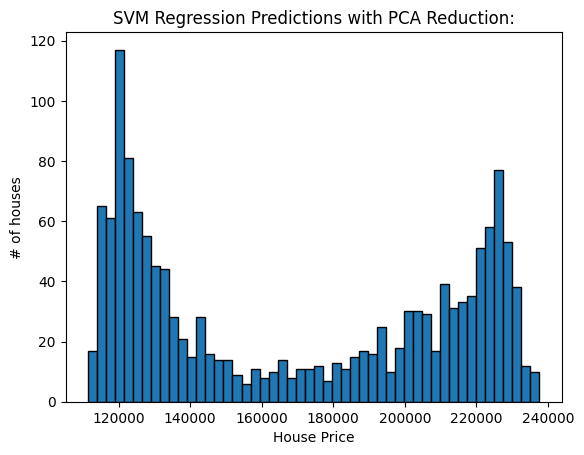

In [211]:
###########################
# PERFORM SVM REGRESSION: #
###########################
# Construct instance of SVM Class for Regression:
svm_regressor = SVR(kernel='sigmoid', C=500)
'''the type of kernel affects the shape
and C seems to affect the spread. These were 
necessary to calibrate, as they substantially 
deviated with poor parameters present.'''

# We fit the via SVM regression and make the prediction:
svm_regressor.fit(pca_train, y_train); SVMr_y_pca = svm_regressor.predict(pca_test)

########################
# PLOT SVM REGRESSION: #
############################################
plt.hist(SVMr_y_pca, bins=50, edgecolor='k')

# We label and title and show the training plot:
plt.xlabel('House Price'); plt.ylabel('# of houses')
plt.title('SVM Regression Predictions with PCA Reduction:')
plt.show()

#########################################
# FINAL PREDICTIONS FOR SVM REGRESSION: #
################################################
# Generate final test data predictions for SVMR:
SVMr_output = {'Id': test_df['Id'], 'SalePrice': SVMr_y_pca}
SVMr_output_df = pd.DataFrame(SVMr_output)
SVMr_output_df.to_csv('svm.csv', index=False)